In [1]:
from preamble import *
%matplotlib inline

## Introduction
### Why machine learning?
### Problems that machine learning can solve

### Knowing your task and knowing your data

### Why Python?

### Scikit-learn
#### Installing Scikit-learn

#### Essential Libraries and Tools

##### Jupyter Notebook

##### NumPy

In [2]:
import numpy as np

x = np.array([[1, 2, 3], [4, 5, 6]])
print("x:\n{}".format(x))

x:
[[1 2 3]
 [4 5 6]]


##### SciPy

In [3]:
from scipy import sparse

# create a 2d NumPy array with a diagonal of ones, and zeros everywhere else
eye = np.eye(4)
print("NumPy array:\n{}".format(eye))

NumPy array:
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]


In [4]:
# convert the NumPy array to a SciPy sparse matrix in CSR format
# only the non-zero entries are stored
sparse_matrix = sparse.csr_matrix(eye)
print("\nSciPy sparse CSR matrix:\n{}".format(sparse_matrix))


SciPy sparse CSR matrix:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


In [5]:
data = np.ones(4)
row_indices = np.arange(4)
col_indices = np.arange(4)
eye_coo = sparse.coo_matrix((data, (row_indices, col_indices)))
print("COO representation:\n{}".format(eye_coo))

COO representation:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


##### matplotlib

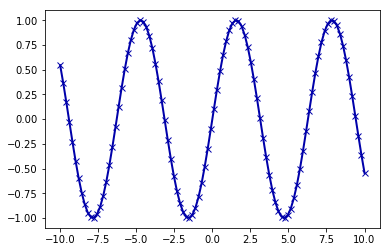

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

# Generate a sequence numbers from -10 to 10 with 100 steps in between
x = np.linspace(-10, 10, 100)
# create a second array using sinus
y = np.sin(x)
# The plot function makes a line chart of one array against another
plt.plot(x, y, marker="x")

##### pandas

In [8]:
import pandas as pd
from IPython.display import display

# create a simple dataset of people
data = {'Name': ["John", "Anna", "Peter", "Linda"],
        'Location' : ["New York", "Paris", "Berlin", "London"],
        'Age' : [24, 13, 53, 33]
       }

data_pandas = pd.DataFrame(data)
# IPython.display allows "pretty printing" of dataframes
# in the Jupyter notebook
display(data_pandas)

,Age,Location,Name
0,24,New York,John
1,13,Paris,Anna
2,53,Berlin,Peter
3,33,London,Linda


In [ ]:
# One of many possible ways to query the table:
# selecting all rows that have an age column greate than 30
display(data_pandas[data_pandas.Age > 30])

##### mglearn

#### Python2 versus Python3

#### Versions Used in this Book

In [ ]:
import sys
print("Python version: {}".format(sys.version))

import pandas as pd
print("pandas version: {}".format(pd.__version__))

import matplotlib
print("matplotlib version: {}".format(matplotlib.__version__))

import numpy as np
print("NumPy version: {}".format(np.__version__))

import scipy as sp
print("SciPy version: {}".format(sp.__version__))

import IPython
print("IPython version: {}".format(IPython.__version__))

import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))

### A First Application: Classifying iris species
![sepal_petal](images/iris_petal_sepal.png)
#### Meet the data

In [ ]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [ ]:
print("Keys of iris_dataset: {}".format(iris_dataset.keys()))

In [ ]:
print(iris_dataset['DESCR'][:193] + "\n...")

In [ ]:
print("Target names: {}".format(iris_dataset['target_names']))

In [ ]:
print("Feature names: {}".format(iris_dataset['feature_names']))

In [ ]:
print("Type of data: {}".format(type(iris_dataset['data'])))

In [ ]:
print("Shape of data: {}".format(iris_dataset['data'].shape))

In [ ]:
print("First five rows of data:\n{}".format(iris_dataset['data'][:5]))

In [ ]:
print("Type of target: {}".format(type(iris_dataset['target'])))

In [ ]:
print("Shape of target: {}".format(iris_dataset['target'].shape))

In [ ]:
print("Target:\n{}".format(iris_dataset['target']))

#### Measuring Success: Training and testing data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

In [ ]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

In [ ]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

#### First things first: Look at your data

In [ ]:
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# create a scatter matrix from the dataframe, color by y_train
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',
                           hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)

#### Building your first model: k nearest neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(X_train, y_train)

#### Making predictions

In [ ]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

In [ ]:
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
       iris_dataset['target_names'][prediction]))

#### Evaluating the model

In [ ]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

In [ ]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

In [ ]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

### Summary and Outlook

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))